In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf
#from streamlit_drawable_canvas import st_canvas
import subprocess

In [3]:
df = pd.read_csv('traintrain.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dftest = pd.read_csv('testtest.csv')
dftest

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.drop('label', axis=1)
y = df['label']

# One-hot encode the target
y = to_categorical(y)

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=41)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [6]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Couche de sortie pour la classification multi-classes
])


# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2024-08-01 09:42:20.405727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Définir le callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Surveiller la perte sur l'ensemble de validation
                               patience=10,        # Nombre d'époques sans amélioration avant d'arrêter l'entraînement
                               restore_best_weights=True)  # Restaurer les meilleurs poids observés

# Entraîner le modèle avec EarlyStopping
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Evaluate the model
evaluation = model.evaluate(X_val, y_val)

# Print the evaluation metrics
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")



Epoch 1/100
1050/1050 [==============================] - 5s 4ms/step - loss: 0.9800 - accuracy: 0.6997 - val_loss: 0.2838 - val_accuracy: 0.9202
Epoch 2/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5079 - accuracy: 0.8612 - val_loss: 0.2402 - val_accuracy: 0.9318
Epoch 3/100
1050/1050 [==============================] - 4s 3ms/step - loss: 0.4150 - accuracy: 0.8900 - val_loss: 0.2110 - val_accuracy: 0.9408
Epoch 4/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3597 - accuracy: 0.9053 - val_loss: 0.1921 - val_accuracy: 0.9455
Epoch 5/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3297 - accuracy: 0.9112 - val_loss: 0.1867 - val_accuracy: 0.9481
Epoch 6/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2969 - accuracy: 0.9223 - val_loss: 0.1775 - val_accuracy: 0.9521
Epoch 7/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2810 - accuracy: 0.9264 - val_loss: 0.1690 - val_ac

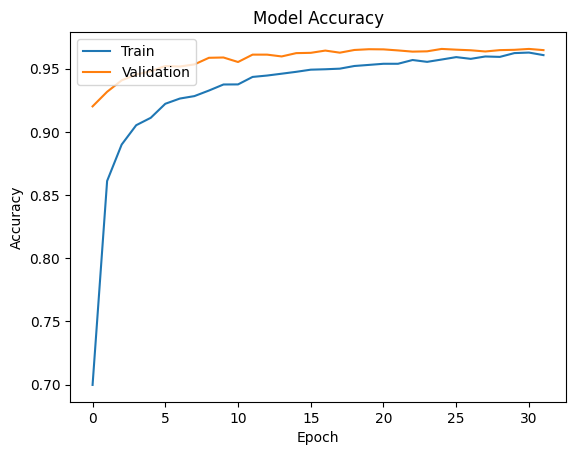

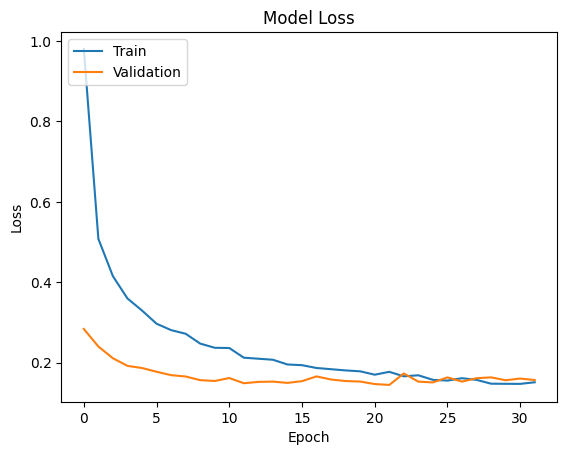

In [8]:
# Summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
import os

model_path = 'classification_model.h5'  # ou 'classification_model.h5'

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Le fichier de modèle {model_path} n'a pas été trouvé.")
else:
    model = tf.keras.models.load_model(model_path)


In [12]:
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image
from streamlit_drawable_canvas import st_canvas

# Charger le modèle
model = tf.keras.models.load_model('classification_model.h5')

# Fonction pour prédire le chiffre
def predict_digit(image):
    image = image.resize((28, 28)).convert('L')  # Convertir en niveaux de gris et redimensionner
    image = np.array(image).astype('float32') / 255
    image = image.reshape(1, 28, 28, 1)  # Ajouter la dimension batch
    prediction = model.predict(image)
    return np.argmax(prediction), max(prediction[0])

# Interface utilisateur avec Streamlit
st.title('Reconnaissance de Chiffres')

# Option pour dessiner un chiffre
st.write('Dessinez un chiffre ci-dessous:')
canvas_result = st_canvas(
    fill_color='#000000',  # Couleur de remplissage
    stroke_width=10,
    stroke_color='#FFFFFF',
    background_color='#000000',
    height=150,
    width=150,
    drawing_mode='freedraw',
    key='canvas'
)

# Variable pour stocker l'état de la prédiction
predicted_digit = None
confidence = 0.0

# Option pour choisir une image aléatoire du dataset MNIST
if st.button('Choisir une image aléatoire'):
    # Charger les données MNIST
    (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    random_idx = np.random.randint(0, X_train.shape[0])
    image = X_train[random_idx]
    st.image(image, width=150)
    image = Image.fromarray(image)
    
    # Prédire l'image
    predicted_digit, confidence = predict_digit(image)
    st.write(f'Prédiction: {predicted_digit}, Confiance: {confidence:.2f}')

# Prédire l'image dessinée
if canvas_result.image_data is not None:
    image = Image.fromarray((canvas_result.image_data[:, :, 0] * 255).astype('uint8'))
    predicted_digit, confidence = predict_digit(image)
    st.write(f'Prédiction: {predicted_digit}, Confiance: {confidence:.2f}')

# Bouton pour valider la prédiction
if predicted_digit is not None:
    st.write('Le modèle a-t-il correctement identifié le chiffre?')
    if st.button('Oui'):
        st.write('Super ! Le modèle a fait une bonne prédiction.')
    elif st.button('Non'):
        st.write('Désolé, le modèle a fait une erreur.')


2024-08-01 09:58:49.639 
  command:

    streamlit run /home/esnault/.pyenv/versions/3.10.6/envs/simplon/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Supposons que df est votre DataFrame et 'label' est la colonne cible
df1 = pd.read_csv('traintrain.csv')  # Assurez-vous de charger votre DataFrame

X = df1.drop(columns=['label'])
y = df1['label']

# Normaliser les données et redimensionner
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Sauvegarder le modèle
model.save('optimized_classification_model.h5')



Taille de l'ensemble d'entraînement : (33600, 28, 28, 1)
Taille de l'ensemble de test : (8400, 28, 28, 1)
Epoch 1/50
945/945 [==============================] - 18s 18ms/step - loss: 0.2338 - accuracy: 0.9263 - val_loss: 0.0657 - val_accuracy: 0.9815
Epoch 2/50
945/945 [==============================] - 18s 19ms/step - loss: 0.0767 - accuracy: 0.9759 - val_loss: 0.0529 - val_accuracy: 0.9848
Epoch 3/50
945/945 [==============================] - 20s 21ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.0430 - val_accuracy: 0.9884
Epoch 4/50
945/945 [==============================] - 19s 20ms/step - loss: 0.0444 - accuracy: 0.9854 - val_loss: 0.0435 - val_accuracy: 0.9875
Epoch 5/50
945/945 [==============================] - 31s 33ms/step - loss: 0.0361 - accuracy: 0.9881 - val_loss: 0.0450 - val_accuracy: 0.9860
Epoch 6/50
945/945 [==============================] - 31s 32ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0376 - val_accuracy: 0.9881
Epoch 7/50
945/945 [==========

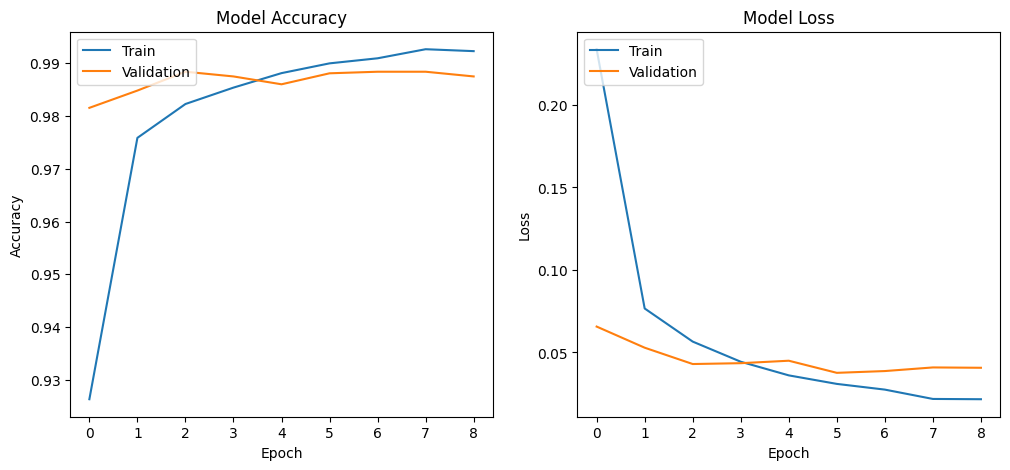

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [45]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)             